# Compas Dataset Analysis

In [1]:
import pandas as pd
import numpy as np

## General

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6907 entries, 0 to 6906
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sex                      6907 non-null   object 
 1   age                      6907 non-null   int64  
 2   age_cat                  6907 non-null   object 
 3   race                     6907 non-null   object 
 4   juv_fel_count            6907 non-null   int64  
 5   decile_score             6907 non-null   int64  
 6   juv_misd_count           6907 non-null   int64  
 7   juv_other_count          6907 non-null   int64  
 8   priors_count             6907 non-null   int64  
 9   days_b_screening_arrest  6907 non-null   float64
 10  c_charge_degree          6907 non-null   object 
 11  is_recid                 6907 non-null   int64  
 12  is_violent_recid         6907 non-null   int64  
 13  type_of_assessment       6907 non-null   object 
 14  decile_score.1          

<AxesSubplot:ylabel='two_year_recid'>

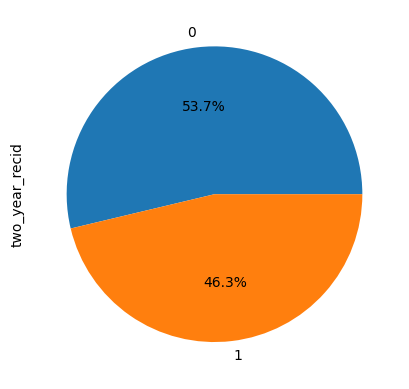

In [2]:
df = pd.read_csv("../Cleaned/Compas/Compas.csv", skipinitialspace=True)
df.info()
print("target count")
print(df['two_year_recid'].value_counts())
df['two_year_recid'].value_counts().plot(kind='pie',autopct='%1.1f%%')

## Sex

Male      5579
Female    1328
Name: sex, dtype: int64


<AxesSubplot:ylabel='sex'>

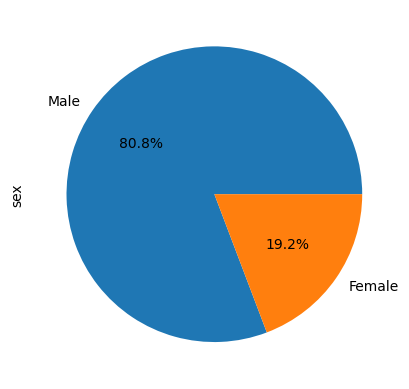

In [4]:
print(df['sex'].value_counts())
df['sex'].value_counts().plot(kind='pie',autopct='%1.1f%%')

Considering sex = Male

0    2870
1    2709
Name: two_year_recid, dtype: int64


<AxesSubplot:ylabel='two_year_recid'>

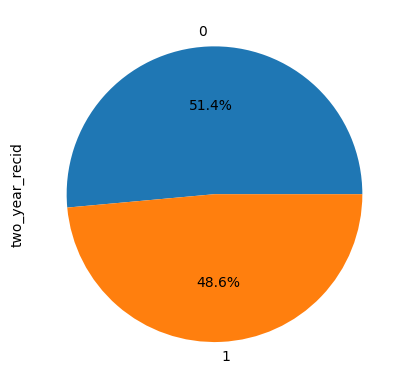

In [6]:
print(df.loc[df['sex']=="Male"]['two_year_recid'].value_counts())
df.loc[df['sex']=="Male"]['two_year_recid'].value_counts().plot(kind='pie',autopct='%1.1f%%')

Considering sex = Female

0    841
1    487
Name: two_year_recid, dtype: int64


<AxesSubplot:ylabel='two_year_recid'>

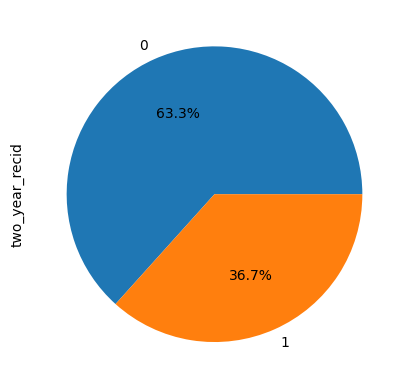

In [7]:
print(df.loc[df['sex']=="Female"]['two_year_recid'].value_counts())
df.loc[df['sex']=="Female"]['two_year_recid'].value_counts().plot(kind='pie',autopct='%1.1f%%')

### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = 0

let y- = 1

let s0 = Male

let s1 = Female

In [10]:
# p(y+|s0) -> p(0|Male)
p1 = len(df.loc[(df['sex']=="Male") & (df['two_year_recid']==0)]) / len(df.loc[df['sex']=="Male"])
#print(p1)
# p(y-|s1) -> p(1|Female)
p2 = len(df.loc[(df['sex']=="Female") & (df['two_year_recid']==1)]) / len(df.loc[df['sex']=="Female"])
#print(p2)
# p(y+|s1) -> p(0|Female)
p3 = len(df.loc[(df['sex']=="Female") & (df['two_year_recid']==0)]) / len(df.loc[df['sex']=="Female"])
#print(p3)
# p(y-|s0) -> p(1|Male)
p4 = len(df.loc[(df['sex']=="Male") & (df['two_year_recid']==1)]) / len(df.loc[df['sex']=="Male"])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

OR: 0.613


### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = 0

let y- = 1

let s0 = Male

let s1 = Female

In [11]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 0.812


### Proxies

Most of the proxies found for sex include (a combination of):
 - v_score_text
 - juv_fel_count
 - is_recid

Best model (min depth) found with a node at depth 2 with 35 samples.

	** v_score_text_High > 0.5 , juv_fel_count > 1.5 ,  #impurity: 0.0, #samples: 35.

Best model (max sample) found with 134 sample in a node at depth 6.

    ** start > 1.5 , start > 34.5 , v_decile_score > 5.5 , is_recid > 0.5 , c_charge_degree_F > 0.5 , age <= 37.5 ,  #impurity: 0.0, #samples: 134.
    
        

For proxy: v_score_text == High & juv_fel_count > 1.5

Male    35
Name: sex, dtype: int64


<AxesSubplot:ylabel='sex'>

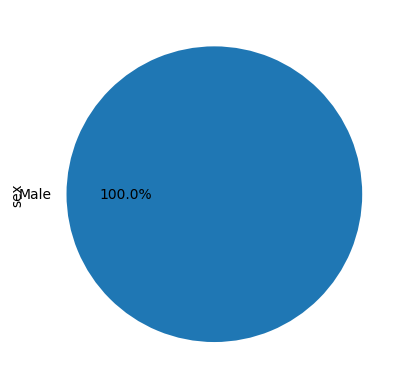

In [12]:
print(df.loc[(df['v_score_text']=="High") & (df['juv_fel_count']>1.5)]['sex'].value_counts())
df.loc[(df['v_score_text']=="High") & (df['juv_fel_count']>1.5)]['sex'].value_counts().plot(kind='pie',autopct='%1.1f%%')

1    30
0     5
Name: two_year_recid, dtype: int64


<AxesSubplot:ylabel='two_year_recid'>

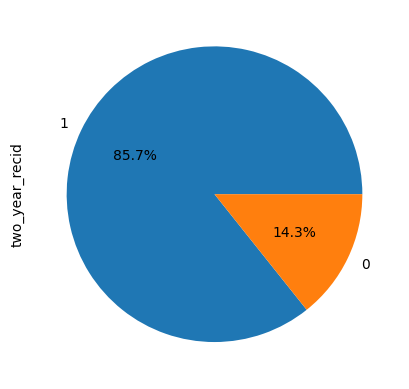

In [14]:
print(df.loc[(df['v_score_text']=="High") & (df['juv_fel_count']>1.5)]['two_year_recid'].value_counts())
df.loc[(df['v_score_text']=="High") & (df['juv_fel_count']>1.5)]['two_year_recid'].value_counts().plot(kind='pie',autopct='%1.1f%%')

### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = 0

let y- = 1

let s0 = belongs to proxy

let s1 = does not belong to proxy

In [15]:
# p(y+|s0) -> p(0|Proxy)
p1 = len(df.loc[(df['v_score_text']=="High") & (df['juv_fel_count']>1.5) & (df['two_year_recid']==0)]) / len(df.loc[(df['v_score_text']=="High") & (df['juv_fel_count']>1.5)])
#print(p1)
# p(y-|s1) -> p(1|!Proxy)
p2 = len(df.loc[((df['v_score_text']!="High") | (df['juv_fel_count']<=1.5)) & (df['two_year_recid']==1)]) / len(df.loc[((df['v_score_text']!="High") | (df['juv_fel_count']<=1.5))])
#print(p2)
# p(y+|s1) -> p(0|!Proxy)
p3 = len(df.loc[((df['v_score_text']!="High") | (df['juv_fel_count']<=1.5)) & (df['two_year_recid']==0)]) / len(df.loc[((df['v_score_text']!="High") | (df['juv_fel_count']<=1.5))])
#print(p3)
# p(y-|s0) -> p(1|Proxy)
p4 = len(df.loc[(df['v_score_text']=="High") & (df['juv_fel_count']>1.5) & (df['two_year_recid']==1)]) / len(df.loc[(df['v_score_text']=="High") & (df['juv_fel_count']>1.5)])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

OR: 0.142


### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = 0

let y- = 1

let s0 = belongs to proxy

let s1 = does not belong to proxy

In [16]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 0.265


considering just the universe of Male persons

In [17]:
# p(y+|s0) -> p(0|Proxy)
p1 = len(df.loc[(df['v_score_text']=="High") & (df['juv_fel_count']>1.5) & (df['two_year_recid']==0) & (df['sex']=="Male")]) / len(df.loc[(df['v_score_text']=="High") & (df['juv_fel_count']>1.5) & (df['sex']=="Male")])
#print(p1)
# p(y-|s1) -> p(1|!Proxy)
p2 = len(df.loc[((df['v_score_text']!="High") | (df['juv_fel_count']<=1.5)) & (df['two_year_recid']==1) & (df['sex']=="Male")]) / len(df.loc[((df['v_score_text']!="High") | (df['juv_fel_count']<=1.5)) & (df['sex']=="Male")])
#print(p2)
# p(y+|s1) -> p(0|!Proxy)
p3 = len(df.loc[((df['v_score_text']!="High") | (df['juv_fel_count']<=1.5)) & (df['two_year_recid']==0) & (df['sex']=="Male")]) / len(df.loc[((df['v_score_text']!="High") | (df['juv_fel_count']<=1.5)) & (df['sex']=="Male")])
#print(p3)
# p(y-|s0) -> p(1|Proxy)
p4 = len(df.loc[(df['v_score_text']=="High") & (df['juv_fel_count']>1.5) & (df['two_year_recid']==1) & (df['sex']=="Male")]) / len(df.loc[(df['v_score_text']=="High") & (df['juv_fel_count']>1.5) & (df['sex']=="Male")])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

OR: 0.156
IR: 0.276


For proxy: start > 34.5 & v_decile_score > 5.5 & is_recid > 0.5 & c_charge_degree == F & age <= 37.5

Male    134
Name: sex, dtype: int64


<AxesSubplot:ylabel='sex'>

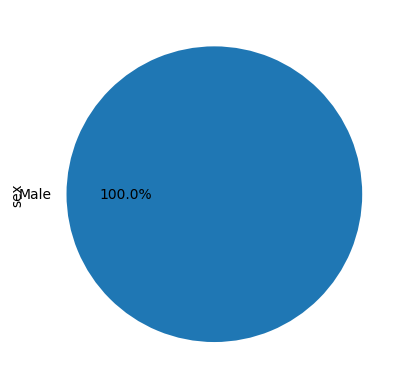

In [18]:
print(df.loc[(df['start']>34.5) & (df['v_decile_score']>5.5) & (df['is_recid']>0.5) & (df['c_charge_degree']=="F") & (df['age']<=37.5)]['sex'].value_counts())
df.loc[(df['start']>34.5) & (df['v_decile_score']>5.5) & (df['is_recid']>0.5) & (df['c_charge_degree']=="F") & (df['age']<=37.5)]['sex'].value_counts().plot(kind='pie',autopct='%1.1f%%')

1    122
0     12
Name: two_year_recid, dtype: int64


<AxesSubplot:ylabel='two_year_recid'>

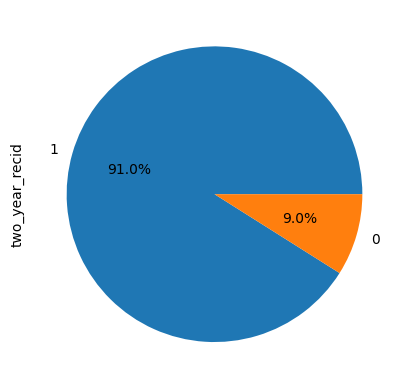

In [19]:
print(df.loc[(df['start']>34.5) & (df['v_decile_score']>5.5) & (df['is_recid']>0.5) & (df['c_charge_degree']=="F") & (df['age']<=37.5)]['two_year_recid'].value_counts())
df.loc[(df['start']>34.5) & (df['v_decile_score']>5.5) & (df['is_recid']>0.5) & (df['c_charge_degree']=="F") & (df['age']<=37.5)]['two_year_recid'].value_counts().plot(kind='pie',autopct='%1.1f%%')

### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = 0

let y- = 1

let s0 = belongs to proxy

let s1 = does not belong to proxy

In [20]:
# p(y+|s0) -> p(0|Proxy)
p1 = len(df.loc[(df['start']>34.5) & (df['v_decile_score']>5.5) & (df['is_recid']>0.5) & (df['c_charge_degree']=="F") & (df['age']<=37.5) & (df['two_year_recid']==0)]) / len(df.loc[(df['start']>34.5) & (df['v_decile_score']>5.5) & (df['is_recid']>0.5) & (df['c_charge_degree']=="F") & (df['age']<=37.5)])
#print(p1)
# p(y-|s1) -> p(1|!Proxy)
p2 = len(df.loc[((df['start']<=34.5) | (df['v_decile_score']<=5.5) | (df['is_recid']<=0.5) | (df['c_charge_degree']!="F") | (df['age']>37.5)) & (df['two_year_recid']==1)]) / len(df.loc[((df['start']<=34.5) | (df['v_decile_score']<=5.5) | (df['is_recid']<=0.5) | (df['c_charge_degree']!="F") | (df['age']>37.5))])
#print(p2)
# p(y+|s1) -> p(0|!Proxy)
p3 = len(df.loc[((df['start']<=34.5) | (df['v_decile_score']<=5.5) | (df['is_recid']<=0.5) | (df['c_charge_degree']!="F") | (df['age']>37.5)) & (df['two_year_recid']==0)]) / len(df.loc[((df['start']<=34.5) | (df['v_decile_score']<=5.5) | (df['is_recid']<=0.5) | (df['c_charge_degree']!="F") | (df['age']>37.5))])
#print(p3)
# p(y-|s0) -> p(1|Proxy)
p4 = len(df.loc[(df['start']>34.5) & (df['v_decile_score']>5.5) & (df['is_recid']>0.5) & (df['c_charge_degree']=="F") & (df['age']<=37.5) & (df['two_year_recid']==1)]) / len(df.loc[(df['start']>34.5) & (df['v_decile_score']>5.5) & (df['is_recid']>0.5) & (df['c_charge_degree']=="F") & (df['age']<=37.5)])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

OR: 0.082


### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = 0

let y- = 1

let s0 = belongs to proxy

let s1 = does not belong to proxy

In [21]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 0.164


## Race

African-American    3537
Caucasian           2378
Hispanic             584
Other                360
Asian                 32
Native American       16
Name: race, dtype: int64


<AxesSubplot:ylabel='race'>

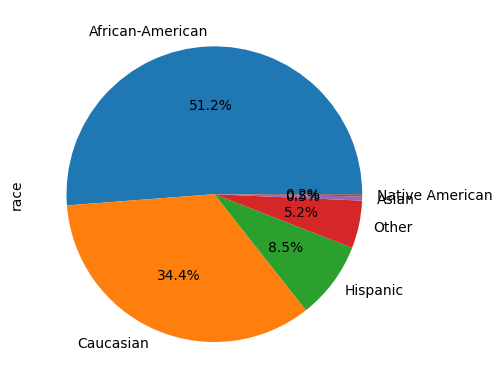

In [22]:
print(df['race'].value_counts())
df['race'].value_counts().plot(kind='pie',autopct='%1.1f%%')

Considering race = African-American

1    1869
0    1668
Name: two_year_recid, dtype: int64


<AxesSubplot:ylabel='two_year_recid'>

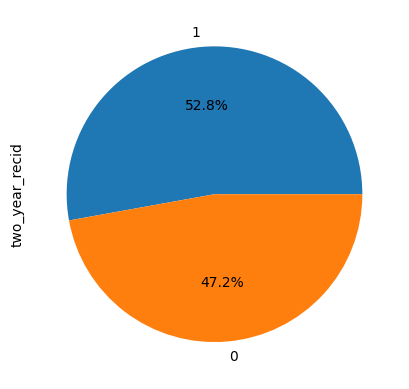

In [23]:
print(df.loc[df['race']=="African-American"]['two_year_recid'].value_counts())
df.loc[df['race']=="African-American"]['two_year_recid'].value_counts().plot(kind='pie',autopct='%1.1f%%')

Considering race = Caucasian

0    1421
1     957
Name: two_year_recid, dtype: int64


<AxesSubplot:ylabel='two_year_recid'>

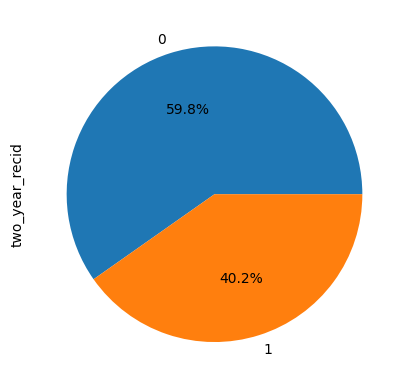

In [24]:
print(df.loc[df['race']=="Caucasian"]['two_year_recid'].value_counts())
df.loc[df['race']=="Caucasian"]['two_year_recid'].value_counts().plot(kind='pie',autopct='%1.1f%%')

Considering race = Hispanic

0    362
1    222
Name: two_year_recid, dtype: int64


<AxesSubplot:ylabel='two_year_recid'>

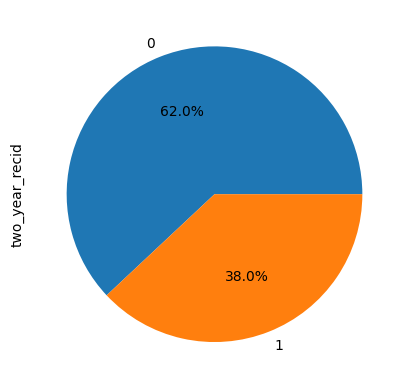

In [25]:
print(df.loc[df['race']=="Hispanic"]['two_year_recid'].value_counts())
df.loc[df['race']=="Hispanic"]['two_year_recid'].value_counts().plot(kind='pie',autopct='%1.1f%%')

Considering race = Other

0    230
1    130
Name: two_year_recid, dtype: int64


<AxesSubplot:ylabel='two_year_recid'>

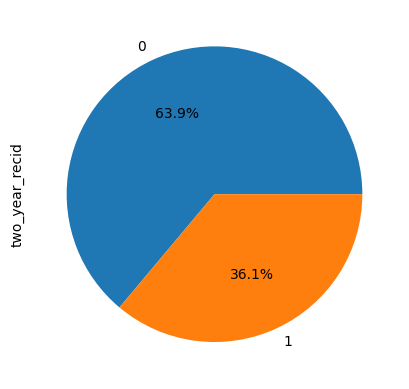

In [26]:
print(df.loc[df['race']=="Other"]['two_year_recid'].value_counts())
df.loc[df['race']=="Other"]['two_year_recid'].value_counts().plot(kind='pie',autopct='%1.1f%%')

Considering race = Asian

0    23
1     9
Name: two_year_recid, dtype: int64


<AxesSubplot:ylabel='two_year_recid'>

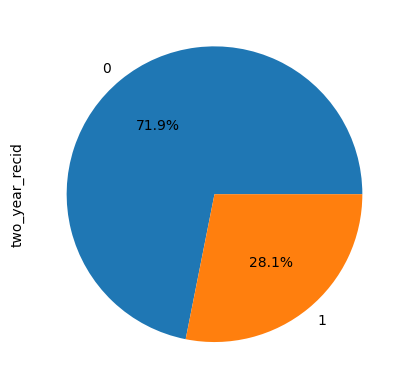

In [27]:
print(df.loc[df['race']=="Asian"]['two_year_recid'].value_counts())
df.loc[df['race']=="Asian"]['two_year_recid'].value_counts().plot(kind='pie',autopct='%1.1f%%')

Considering race = Native American

1    9
0    7
Name: two_year_recid, dtype: int64


<AxesSubplot:ylabel='two_year_recid'>

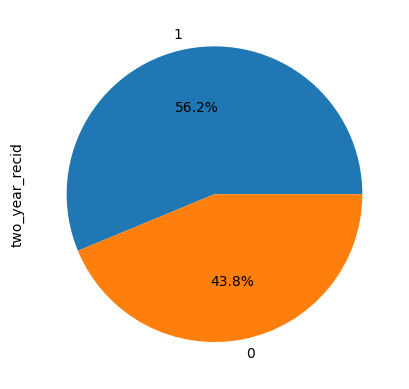

In [28]:
print(df.loc[df['race']=="Native American"]['two_year_recid'].value_counts())
df.loc[df['race']=="Native American"]['two_year_recid'].value_counts().plot(kind='pie',autopct='%1.1f%%')

### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = 0

let y- = 1

let s0 = African-American

let s1 = not African-American

In [29]:
# p(y+|s0) -> p(0|African-American)
p1 = len(df.loc[(df['race']=="African-American") & (df['two_year_recid']==0)]) / len(df.loc[df['race']=="African-American"])
#print(p1)
# p(y-|s1) -> p(1|!African-American)
p2 = len(df.loc[(df['race']!="African-American") & (df['two_year_recid']==1)]) / len(df.loc[df['race']!="African-American"])
#print(p2)
# p(y+|s1) -> p(0|!African-American)
p3 = len(df.loc[(df['race']!="African-American") & (df['two_year_recid']==0)]) / len(df.loc[df['race']!="African-American"])
#print(p3)
# p(y-|s0) -> p(1|African-American)
p4 = len(df.loc[(df['race']=="African-American") & (df['two_year_recid']==1)]) / len(df.loc[df['race']=="African-American"])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

OR: 0.580


### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = 0

let y- = 1

let s0 = African-American

let s1 = not African-American

In [30]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 0.778


### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = 0

let y- = 1

let s0 = Caucasian

let s1 = not Caucasian

In [31]:
# p(y+|s0) -> p(0|Caucasian)
p1 = len(df.loc[(df['race']=="Caucasian") & (df['two_year_recid']==0)]) / len(df.loc[df['race']=="Caucasian"])
#print(p1)
# p(y-|s1) -> p(1|!Caucasian)
p2 = len(df.loc[(df['race']!="Caucasian") & (df['two_year_recid']==1)]) / len(df.loc[df['race']!="Caucasian"])
#print(p2)
# p(y+|s1) -> p(0|!Caucasian)
p3 = len(df.loc[(df['race']!="Caucasian") & (df['two_year_recid']==0)]) / len(df.loc[df['race']!="Caucasian"])
#print(p3)
# p(y-|s0) -> p(1|Caucasian)
p4 = len(df.loc[(df['race']=="Caucasian") & (df['two_year_recid']==1)]) / len(df.loc[df['race']=="Caucasian"])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

OR: 1.452


### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = 0

let y- = 1

let s0 = Caucasian

let s1 = not Caucasian

In [32]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 1.182


### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = 0

let y- = 1

let s0 = Hispanic

let s1 = Hispanic

In [33]:
# p(y+|s0) -> p(0|Hispanic)
p1 = len(df.loc[(df['race']=="Hispanic") & (df['two_year_recid']==0)]) / len(df.loc[df['race']=="Hispanic"])
#print(p1)
# p(y-|s1) -> p(1|!Hispanic)
p2 = len(df.loc[(df['race']!="Hispanic") & (df['two_year_recid']==1)]) / len(df.loc[df['race']!="Hispanic"])
#print(p2)
# p(y+|s1) -> p(0|!Hispanic)
p3 = len(df.loc[(df['race']!="Hispanic") & (df['two_year_recid']==0)]) / len(df.loc[df['race']!="Hispanic"])
#print(p3)
# p(y-|s0) -> p(1|Hispanic)
p4 = len(df.loc[(df['race']=="Hispanic") & (df['two_year_recid']==1)]) / len(df.loc[df['race']=="Hispanic"])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

OR: 1.448


### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = 0

let y- = 1

let s0 = Hispanic

let s1 = not Hispanic

In [34]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 1.170


### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = 0

let y- = 1

let s0 = Other

let s1 = not Other

In [35]:
# p(y+|s0) -> p(0|Other)
p1 = len(df.loc[(df['race']=="Other") & (df['two_year_recid']==0)]) / len(df.loc[df['race']=="Other"])
#print(p1)
# p(y-|s1) -> p(1|!Other)
p2 = len(df.loc[(df['race']!="Other") & (df['two_year_recid']==1)]) / len(df.loc[df['race']!="Other"])
#print(p2)
# p(y+|s1) -> p(0|!Other)
p3 = len(df.loc[(df['race']!="Other") & (df['two_year_recid']==0)]) / len(df.loc[df['race']!="Other"])
#print(p3)
# p(y-|s0) -> p(1|Other)
p4 = len(df.loc[(df['race']=="Other") & (df['two_year_recid']==1)]) / len(df.loc[df['race']=="Other"])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

OR: 1.558


### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = 0

let y- = 1

let s0 = Other

let s1 = not Other

In [36]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 1.202


### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = 0

let y- = 1

let s0 = Asian

let s1 = not Asian

In [37]:
# p(y+|s0) -> p(0|Asian)
p1 = len(df.loc[(df['race']=="Asian") & (df['two_year_recid']==0)]) / len(df.loc[df['race']=="Asian"])
#print(p1)
# p(y-|s1) -> p(1|!Asian)
p2 = len(df.loc[(df['race']!="Asian") & (df['two_year_recid']==1)]) / len(df.loc[df['race']!="Asian"])
#print(p2)
# p(y+|s1) -> p(0|!Asian)
p3 = len(df.loc[(df['race']!="Asian") & (df['two_year_recid']==0)]) / len(df.loc[df['race']!="Asian"])
#print(p3)
# p(y-|s0) -> p(1|Asian)
p4 = len(df.loc[(df['race']=="Asian") & (df['two_year_recid']==1)]) / len(df.loc[df['race']=="Asian"])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

OR: 2.208


### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = 0

let y- = 1

let s0 = Asian

let s1 = not Asian

In [38]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 1.340


### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = 0

let y- = 1

let s0 = Native American

let s1 = not Native American

In [39]:
# p(y+|s0) -> p(0|Native American)
p1 = len(df.loc[(df['race']=="Native American") & (df['two_year_recid']==0)]) / len(df.loc[df['race']=="Native American"])
#print(p1)
# p(y-|s1) -> p(1|!Native American)
p2 = len(df.loc[(df['race']!="Native American") & (df['two_year_recid']==1)]) / len(df.loc[df['race']!="Native American"])
#print(p2)
# p(y+|s1) -> p(0|!Native American)
p3 = len(df.loc[(df['race']!="Native American") & (df['two_year_recid']==0)]) / len(df.loc[df['race']!="Native American"])
#print(p3)
# p(y-|s0) -> p(1|Native American)
p4 = len(df.loc[(df['race']=="Native American") & (df['two_year_recid']==1)]) / len(df.loc[df['race']=="Native American"])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

OR: 0.669


### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = 0

let y- = 1

let s0 = Native American

let s1 = not Native American

In [40]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 0.814


### Proxies

Most of the proxies found for race include (a combination of):
 - decile_score
 - score_text
 - priors_count
 - occupation


Best model (min depth) found with a node at depth 2 with 16 samples.

	** score_text_High > 0.5 , end <= 5.5 ,  #impurity: 0.0, #samples: 16.

Best model (max sample) found with 63 sample in a node at depth 7.

    ** age <= 37.5 , is_recid > 0.5 , v_decile_score > 4.5 , decile_score > 6.5 , priors_count > 11.5 , end > 122.0 , start <= 37.5 ,  #impurity: 0.0, #samples: 63.



For proxy: score_text == High & end <= 5.5

African-American    16
Name: race, dtype: int64


<AxesSubplot:ylabel='race'>

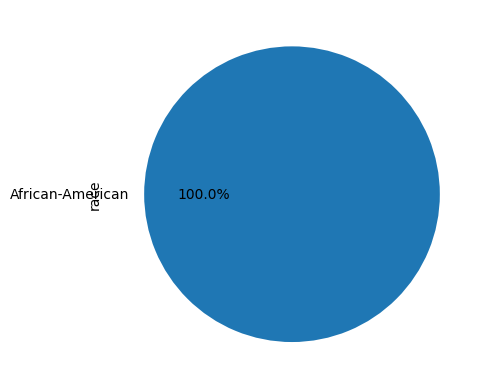

In [41]:
print(df.loc[(df['score_text']=="High") & (df['end']<=5.5)]['race'].value_counts())
df.loc[(df['score_text']=="High") & (df['end']<=5.5)]['race'].value_counts().plot(kind='pie',autopct='%1.1f%%')

1    16
Name: two_year_recid, dtype: int64


<AxesSubplot:ylabel='two_year_recid'>

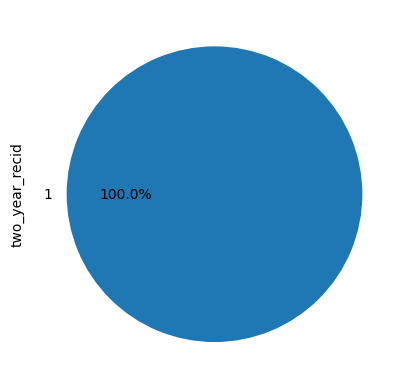

In [42]:
print(df.loc[(df['score_text']=="High") & (df['end']<=5.5)]['two_year_recid'].value_counts())
df.loc[(df['score_text']=="High") & (df['end']<=5.5)]['two_year_recid'].value_counts().plot(kind='pie',autopct='%1.1f%%')

### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = 0

let y- = 1

let s0 = belongs to proxy

let s1 = does not belong to proxy

In [43]:
# p(y+|s0) -> p(0|Proxy)
p1 = len(df.loc[(df['score_text']=="High") & (df['end']<=5.5) & (df['two_year_recid']==0)]) / len(df.loc[(df['score_text']=="High") & (df['end']<=5.5)])
#print(p1)
# p(y-|s1) -> p(1|!Proxy)
p2 = len(df.loc[((df['score_text']!="High") | (df['end']>5.5)) & (df['two_year_recid']==1)]) / len(df.loc[((df['score_text']!="High") | (df['end']>5.5))])
#print(p2)
# p(y+|s1) -> p(0|!Proxy)
p3 = len(df.loc[((df['score_text']!="High") | (df['end']>5.5)) & (df['two_year_recid']==0)]) / len(df.loc[((df['score_text']!="High") | (df['end']>5.5))])
#print(p3)
# p(y-|s0) -> p(1|Proxy)
p4 = len(df.loc[(df['score_text']=="High") & (df['end']<=5.5) & (df['two_year_recid']==1)]) / len(df.loc[(df['score_text']=="High") & (df['end']<=5.5)])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

OR: 0.000


### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = 0

let y- = 1

let s0 = belongs to proxy

let s1 = does not belong to proxy

In [44]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 0.000


For proxy: age <= 37.5 & is_recid > 0.5 & v_decile_score > 4.5 & decile_score > 6.5 & priors_count > 11.5 & end > 122.0 & start <= 37.5

African-American    63
Name: race, dtype: int64


<AxesSubplot:ylabel='race'>

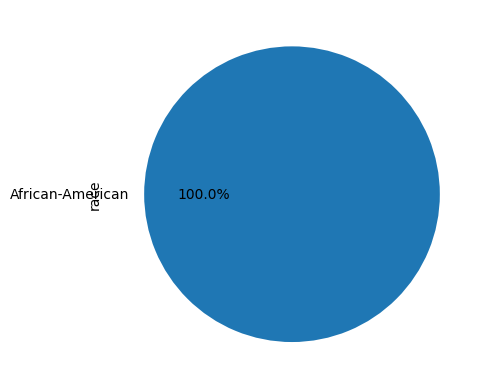

In [45]:
print(df.loc[(df['age']<=37.5) & (df['is_recid']>0.5) & (df['v_decile_score']>4.5) & (df['decile_score']>6.5) & (df['priors_count']>11.5) & (df['end']>122.0) & (df['start']<=37.5)]['race'].value_counts())
df.loc[(df['age']<=37.5) & (df['is_recid']>0.5) & (df['v_decile_score']>4.5) & (df['decile_score']>6.5) & (df['priors_count']>11.5) & (df['end']>122.0) & (df['start']<=37.5)]['race'].value_counts().plot(kind='pie',autopct='%1.1f%%')

1    60
0     3
Name: two_year_recid, dtype: int64


<AxesSubplot:ylabel='two_year_recid'>

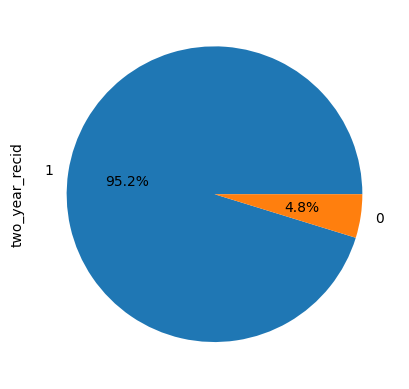

In [46]:
print(df.loc[(df['age']<=37.5) & (df['is_recid']>0.5) & (df['v_decile_score']>4.5) & (df['decile_score']>6.5) & (df['priors_count']>11.5) & (df['end']>122.0) & (df['start']<=37.5)]['two_year_recid'].value_counts())
df.loc[(df['age']<=37.5) & (df['is_recid']>0.5) & (df['v_decile_score']>4.5) & (df['decile_score']>6.5) & (df['priors_count']>11.5) & (df['end']>122.0) & (df['start']<=37.5)]['two_year_recid'].value_counts().plot(kind='pie',autopct='%1.1f%%')

### Odds Ratio

- measures the association between exposure and outcome
- represents the odds that an outcome will happen given a specific exposure compared to the odds of an outcome happening without such exposure

OR = (p(y+|s0)p(y-|s1)/(p(y+|s1)p(y-|s0)))

- OR = 1 --> Exposure has no effect on the odds of an outcome
- OR > 1 --> Exposure causes higher odds of an outcome
- OR < 1 --> Exposure causes lower odds of an outcome

let y+ = 0

let y- = 1

let s0 = belongs to proxy

let s1 = does not belong to proxy

In [47]:
# p(y+|s0) -> p(0|Proxy)
p1 = len(df.loc[(df['age']<=37.5) & (df['is_recid']>0.5) & (df['v_decile_score']>4.5) & (df['decile_score']>6.5) & (df['priors_count']>11.5) & (df['end']>122.0) & (df['start']<=37.5) & (df['two_year_recid']==0)]) / len(df.loc[(df['age']<=37.5) & (df['is_recid']>0.5) & (df['v_decile_score']>4.5) & (df['decile_score']>6.5) & (df['priors_count']>11.5) & (df['end']>122.0) & (df['start']<=37.5)])
#print(p1)
# p(y-|s1) -> p(1|!Proxy)
p2 = len(df.loc[((df['age']>37.5) | (df['is_recid']<=0.5) | (df['v_decile_score']<=4.5) | (df['decile_score']<=6.5) | (df['priors_count']<=11.5) | (df['end']<=122.0) | (df['start']>37.5)) & (df['two_year_recid']==1)]) / len(df.loc[((df['age']>37.5) | (df['is_recid']<=0.5) | (df['v_decile_score']<=4.5) | (df['decile_score']<=6.5) | (df['priors_count']<=11.5) | (df['end']<=122.0) | (df['start']>37.5))])
#print(p2)
# p(y+|s1) -> p(0|!Proxy)
p3 = len(df.loc[((df['age']>37.5) | (df['is_recid']<=0.5) | (df['v_decile_score']<=4.5) | (df['decile_score']<=6.5) | (df['priors_count']<=11.5) | (df['end']<=122.0) | (df['start']>37.5)) & (df['two_year_recid']==0)]) / len(df.loc[((df['age']>37.5) | (df['is_recid']<=0.5) | (df['v_decile_score']<=4.5) | (df['decile_score']<=6.5) | (df['priors_count']<=11.5) | (df['end']<=122.0) | (df['start']>37.5))])
#print(p3)
# p(y-|s0) -> p(1|Proxy)
p4 = len(df.loc[(df['age']<=37.5) & (df['is_recid']>0.5) & (df['v_decile_score']>4.5) & (df['decile_score']>6.5) & (df['priors_count']>11.5) & (df['end']>122.0) & (df['start']<=37.5) & (df['two_year_recid']==1)]) / len(df.loc[(df['age']<=37.5) & (df['is_recid']>0.5) & (df['v_decile_score']>4.5) & (df['decile_score']>6.5) & (df['priors_count']>11.5) & (df['end']>122.0) & (df['start']<=37.5)])
#print(p4)

oddsratio = (p1 * p2) / (p3 * p4)
print("OR: {:.3f}".format(oddsratio))

OR: 0.042


### Impact Ratio

- is the ratio of positive outcomes for the protected group over the general group
- the closer this ratio is to one, it means the dataset is less biased

IR = p(y+|s0)/p(y+|s1)

- IR = 0 --> Maximum discrimination
- IR = 1 --> No discrimination
- IR = +INF --> Reverse discrimination

let y+ = 0

let y- = 1

let s0 = belongs to proxy

let s1 = does not belong to proxy

In [48]:
impactratio = p1 / p3
print("IR: {:.3f}".format(impactratio))

IR: 0.088
